In [1]:
# importig required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

# READING AND UNDERSTANDING CAR DATASET

In [2]:
# importing car dataset
car_df = pd.read_csv(r"D:\data science projects\trainity projects data analytics\project-7 Analyzing the Impact of Car Features on Price and Profitability\Car_data.csv")
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# shape of the car_df
car_df.shape

(11914, 16)

In [4]:
# data types
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

- null values are present in the car_df and data of dtypes object, int and float
- all column names are ok 

In [5]:
# looking numerical summary of the car_df
car_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# DATA CLEANING 

### Handling Null Values

In [6]:
# looking % null values in different columns
round(car_df.isnull().sum()/car_df.shape[0]*100,2)

Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

- market category has 31% null values and rest columns have less than 1% null values

In [7]:
# investigatin reason for null rows of market category
car_df[car_df["Market Category"].isnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,4dr SUV,21,15,549,64520


In [8]:
# numerical summary of rows with missing market category
car_df[car_df["Market Category"].isnull()].describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,3742.000000,3731.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,2006.688669,194.961136,5.364778,3.474345,25.687333,18.968199,1676.889364,19961.397114
std,8.732324,69.030672,1.388181,0.846875,7.162941,6.090453,1494.869342,13360.041354
min,1990.000000,66.000000,0.000000,2.000000,12.000000,10.000000,26.000000,2000.000000
25%,1999.000000,150.000000,4.000000,3.000000,20.000000,15.000000,549.000000,3096.750000
50%,2008.000000,180.000000,6.000000,4.000000,24.000000,18.000000,1385.000000,21690.000000
75%,2015.000000,230.000000,6.000000,4.000000,30.000000,22.000000,2031.000000,27850.000000
max,2017.000000,450.000000,8.000000,4.000000,92.000000,120.000000,5657.000000,68996.000000


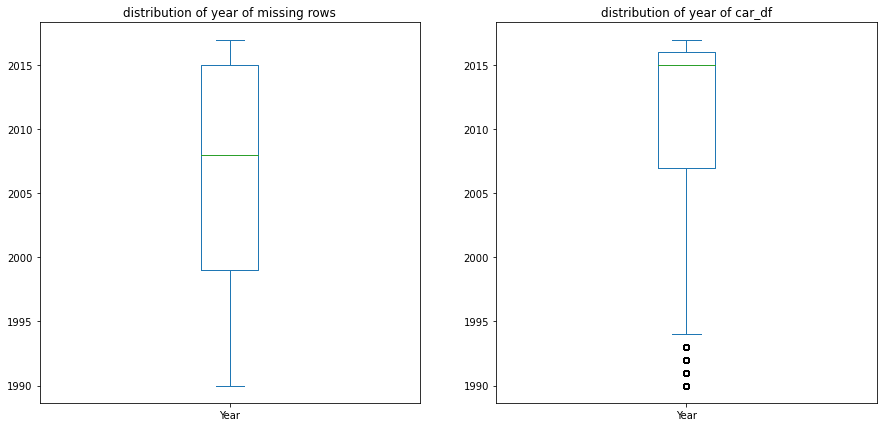

In [9]:
# box plot of years of release of models of cars whose market category not available
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
car_df[car_df["Market Category"].isnull()]["Year"].plot.box()
plt.title("distribution of year of missing rows")

plt.subplot(1,2,2)
car_df["Year"].plot.box()
plt.title("distribution of year of car_df")
plt.show()

- rows of market category are missing completely at random, thus **imputing** their values as **"unknown"**

In [10]:
# imputing "unknown"
car_df["Market Category"] = car_df["Market Category"].fillna("unknown")
car_df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [11]:
# removing all rest rows with null values
car_df = car_df.dropna()
car_df.shape

(11812, 16)

- dropping total **102** rows out of **11914**

### Handling Outliers

In [12]:
# looking numerical summary 
car_df.describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99])

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,11812.000000,1.181200e+04
mean,2010.361581,249.504487,5.649424,3.432526,26.320945,19.328141,1553.679902,4.055994e+04
std,7.594647,109.206947,1.751646,0.882919,7.443589,6.527734,1440.067820,6.028413e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.099000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.997000e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.220500e+04
80%,2016.000000,317.000000,6.000000,4.000000,31.000000,23.000000,2031.000000,4.635000e+04
90%,2017.000000,385.000000,8.000000,4.000000,35.000000,26.000000,3916.000000,6.485450e+04
95%,2017.000000,460.000000,8.000000,4.000000,38.000000,29.000000,5657.000000,1.079427e+05


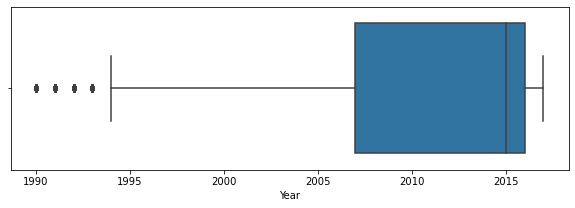

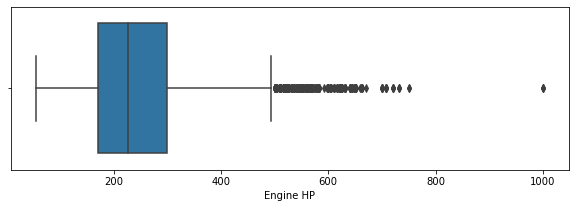

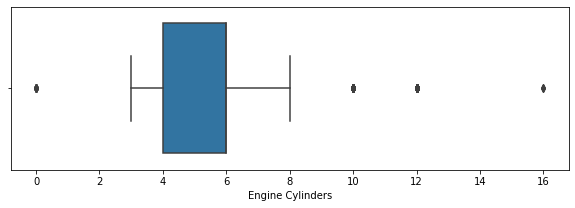

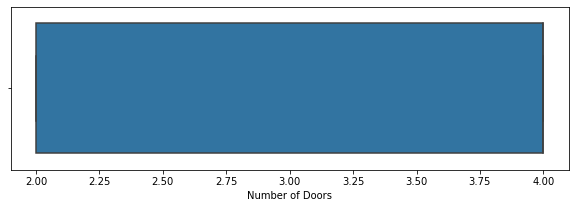

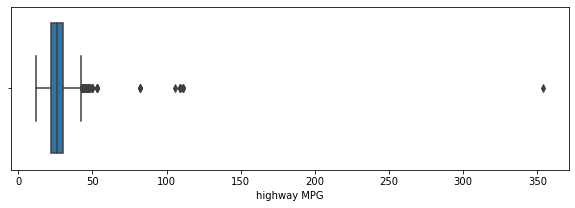

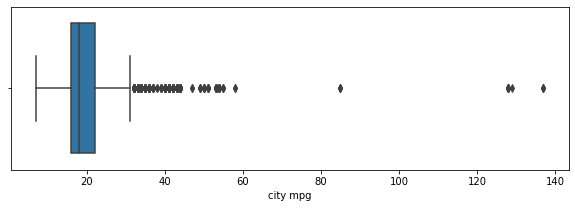

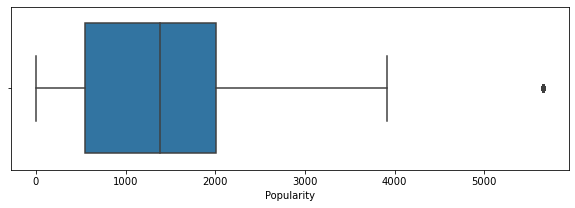

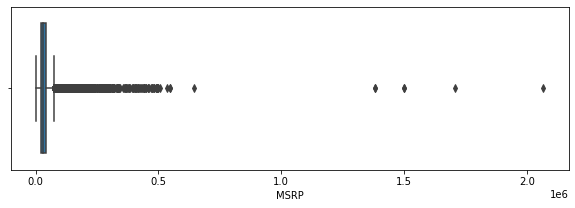

In [13]:
# plotting boxplot to look for outliers
num_col = car_df.select_dtypes(include=["int","float"]).columns
for i in num_col:
    plt.figure(figsize=[10,3])
    sns.boxplot(car_df[i])
    plt.show()

- oultliers are present in the car_df data, we have to do one-by-one analysis to check they are valid or not, and creating buckets if required.

### Engine HP

In [14]:
# looking numerical summary of engine HP
car_df["Engine HP"].describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99])

count    11812.000000
mean       249.504487
std        109.206947
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
80%        317.000000
90%        385.000000
95%        460.000000
99%        620.000000
max       1001.000000
Name: Engine HP, dtype: float64

- median engine HP is **227** whereas mean is **249**
- car with max Engine HP is **1001** and min is **55**

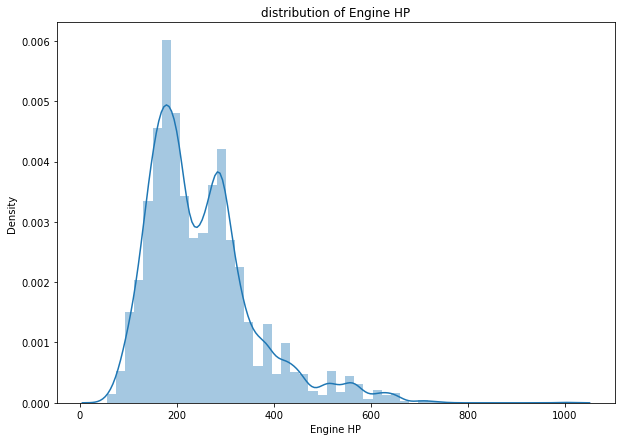

In [15]:
# looking distribution 
plt.figure(figsize=[10,7])
sns.distplot(car_df["Engine HP"])
plt.title("distribution of Engine HP")
plt.show()

- distribution is approx. Normal, most Engine HP values lies between **170-300**

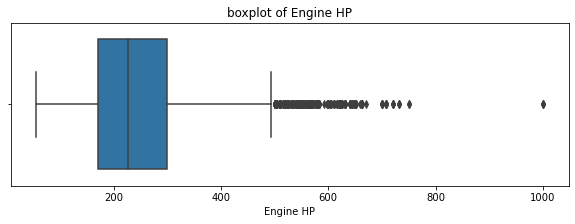

In [16]:
# looking boxplot
plt.figure(figsize=[10,3])
sns.boxplot(car_df["Engine HP"])
plt.title("boxplot of Engine HP")
plt.show()

- there are some outlier Engine HP values preset beyond 600 looking those outlier values

In [17]:
# outlier rows
outlier_hp = car_df[car_df["Engine HP"] > 600]
outlier_hp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
612,Maybach,57,2010,premium unleaded (required),631.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,455500
613,Maybach,57,2010,premium unleaded (required),604.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,405500
615,Maybach,57,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,412000
617,Maybach,57,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Sedan,16,10,67,418950
618,Ferrari,599,2009,premium unleaded (required),611.0,12.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,15,11,2774,320580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,Dodge,Viper,2017,premium unleaded (required),645.0,10.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,19,12,1851,95895
11393,Dodge,Viper,2017,premium unleaded (required),645.0,10.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,19,12,1851,107995
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025


In [18]:
outlier_hp.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,2013.683099,652.78169,10.591549,2.338028,18.880282,12.119718,1360.098592,2.980285e+05
std,3.111110,61.16483,1.917278,0.752182,3.025852,2.074781,1056.221053,3.124962e+05
min,2003.000000,604.00000,8.000000,2.000000,12.000000,7.000000,67.000000,5.420000e+04
25%,2012.000000,621.00000,8.000000,2.000000,16.000000,11.000000,617.000000,9.304500e+04
50%,2015.000000,640.50000,12.000000,2.000000,19.500000,12.000000,1158.000000,2.378750e+05
75%,2016.000000,650.00000,12.000000,2.000000,21.000000,14.000000,1851.000000,3.813500e+05
max,2017.000000,1001.00000,16.000000,4.000000,25.000000,16.000000,5657.000000,2.065902e+06


- these outlier cars are just very Engine HP cars with high  MSRP, highe Engine Cylinders, most cars having 2 doors and low MPG.
- They are exotic, luxury and high performance cars
- **removing very high HP Cars** beyond 800 hp as they will **distort our general trend analysis.**

In [19]:
# removing very hp car
car_df2 = car_df[car_df["Engine HP"] < 800]
car_df2.shape

(11809, 16)

### Engine Cylinders

In [20]:
# looking numerical summary of engine cylinders
car_df["Engine Cylinders"].describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99])

count    11812.000000
mean         5.649424
std          1.751646
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
80%          6.000000
90%          8.000000
95%          8.000000
99%         12.000000
max         16.000000
Name: Engine Cylinders, dtype: float64

- median engine cylinders are **6**
- car with max Engine HP is **16** and min is **0**

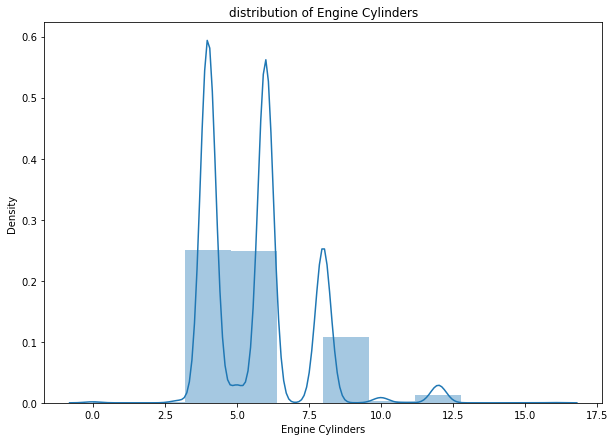

In [21]:
# looking distribution 
plt.figure(figsize=[10,7])
sns.distplot(car_df["Engine Cylinders"],bins=10)
plt.title("distribution of Engine Cylinders")
plt.show()

- most Engine cylinders values lies between **3-8**

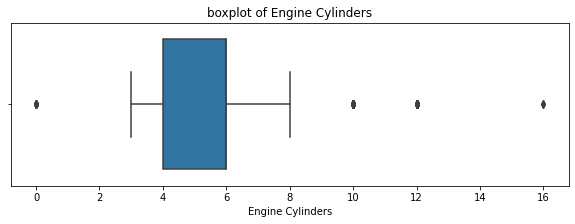

In [22]:
# looking boxplot
plt.figure(figsize=[10,3])
sns.boxplot(car_df["Engine Cylinders"])
plt.title("boxplot of Engine Cylinders")
plt.show()

- there are some outlier Engine Cylinders values preset beyond 8 looking those outlier values

In [23]:
# outlier rows
outlier_cylinders = car_df[car_df["Engine Cylinders"] > 8]
outlier_cylinders

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
460,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,223970
461,Ferrari,456M,2001,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,219775
462,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
463,Ferrari,456M,2002,premium unleaded (required),442.0,12.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,15,9,2774,224585
464,Ferrari,456M,2003,premium unleaded (required),442.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Coupe,18,13,259,208295
11395,Aston Martin,Virage,2012,premium unleaded (required),490.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,13,259,223295
11448,Rolls-Royce,Wraith,2014,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,284900
11449,Rolls-Royce,Wraith,2015,premium unleaded (required),624.0,12.0,AUTOMATIC,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Large,Coupe,21,13,86,294025


In [24]:
outlier_cylinders.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,2011.630000,559.626667,11.586667,2.480000,18.216667,11.510000,1053.983333,2.769600e+05
std,4.968102,93.043346,0.948060,0.855593,2.365383,1.520176,1026.732706,2.199991e+05
min,1992.000000,310.000000,10.000000,2.000000,12.000000,7.000000,67.000000,2.960000e+03
25%,2010.000000,510.000000,12.000000,2.000000,16.000000,11.000000,259.000000,1.919000e+05
50%,2013.000000,560.000000,12.000000,2.000000,19.000000,12.000000,617.000000,2.284820e+05
75%,2015.000000,621.000000,12.000000,2.000000,20.000000,13.000000,1158.000000,3.028462e+05
max,2017.000000,1001.000000,16.000000,4.000000,22.000000,15.000000,3916.000000,2.065902e+06


- these outlier cars are just very high Engine cylinders cars with high  MSRP, highe Engine Cylinders, most cars having 2 doors and low MPG.
- They are exotic, luxury and high performance cars
- leaving as it is as they are valid data points using quantiles for analysis instead average.

### highway MPG & city MPG

In [25]:
# looking numerical summary
car_df[["highway MPG","city mpg"]].describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99])

,highway MPG,city mpg
count,11812.000000,11812.000000
mean,26.320945,19.328141
std,7.443589,6.527734
min,12.000000,7.000000
25%,22.000000,16.000000
50%,26.000000,18.000000
75%,30.000000,22.000000
80%,31.000000,23.000000
90%,35.000000,26.000000
95%,38.000000,29.000000


- median highway MPG is **26**. city MPG is **18**
- car with max highway MPG is **354** and min is **12**
- car with max city mpg is **137** and min is **7**

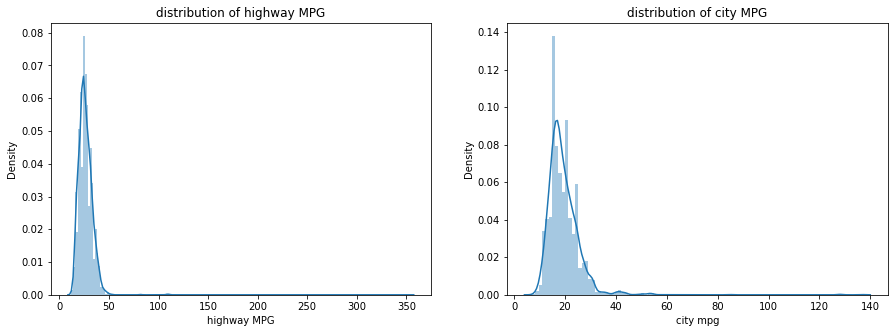

In [26]:
# looking distribution 
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.distplot(car_df["highway MPG"],bins=200)
plt.title("distribution of highway MPG")

plt.subplot(1,2,2)
sns.distplot(car_df["city mpg"],bins=100)
plt.title("distribution of city MPG")
plt.show()

- distribution is right skewed, most MPG values lies below **50**

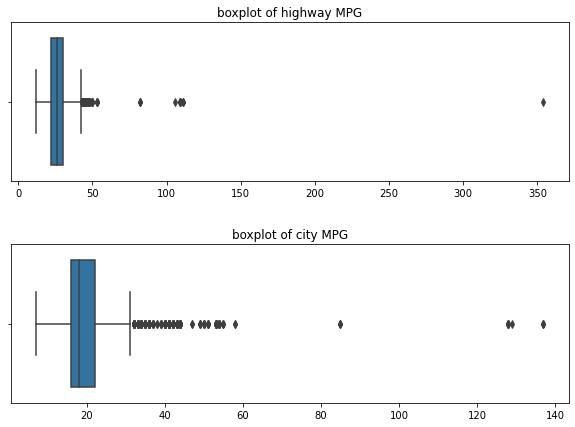

In [27]:
# looking boxplot
plt.figure(figsize=[10,7])
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
sns.boxplot(car_df["highway MPG"])
plt.title("boxplot of highway MPG")
plt.xlabel("")

plt.subplot(2,1,2)
sns.boxplot(car_df["city mpg"])
plt.title("boxplot of city MPG")
plt.xlabel("")
plt.show()

- there are some outlier MPG values preset beyond 50 looking those outlier values

In [28]:
# outlier rows
outlier_mpg = car_df[(car_df["highway MPG"] > 50)|(car_df["city mpg"] > 60)]
outlier_mpg

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
5790,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5791,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5792,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
5793,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,106,129,3916,43600
7676,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,27100
7677,Toyota,Prius Prime,2017,regular unleaded,121.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,53,55,2031,33100


- there is a **invalid** highway milage data present for **Audi	A6	2017** imputing with correct value i.e **34**
- other outlier data are **valid**, they are **electric/hybrid** cars with high  range, 0 engine cylinders and high MSRP

In [29]:
# imputing correct value of highway mpg in audi A6 2017
car_df2["highway MPG"] = car_df2["highway MPG"].replace(354,34)

### MSRP

In [30]:
# looking numerical summary
car_df["MSRP"].describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99]).apply("{0:.2f}".format)

count      11812.00
mean       40559.94
std        60284.13
min         2000.00
25%        20990.00
50%        29970.00
75%        42205.00
80%        46350.00
90%        64854.50
95%       107942.75
99%       284501.64
max      2065902.00
Name: MSRP, dtype: object

- median MSRP is **30K** whereas mean is **40K**
- car with max MSRP is **20Lac** and min is **2k**

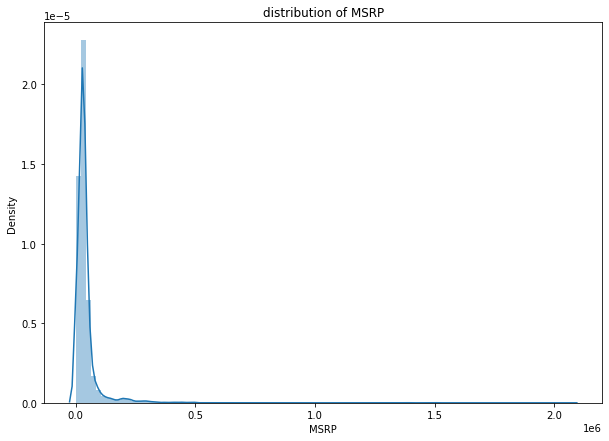

In [31]:
# looking distribution 
plt.figure(figsize=[10,7])
sns.distplot(car_df["MSRP"],bins=100)
plt.title("distribution of MSRP")
plt.show()

- distribution is right skewed, about 99% cars are below **3Lac**

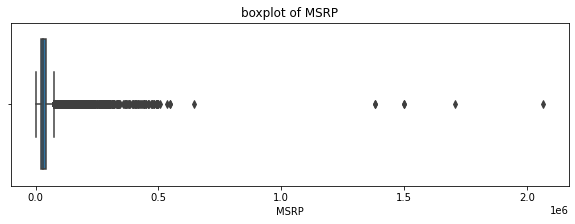

In [32]:
# looking boxplot
plt.figure(figsize=[10,3])
sns.boxplot(car_df["MSRP"])
plt.title("boxplot of MSRP")
plt.show()

- there are some outlier MSRP values preset beyond 5lac looking those outlier values

In [33]:
# outlier rows
outlier_msrp = car_df[car_df["MSRP"] > 500000]
outlier_msrp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
698,Maybach,62,2010,premium unleaded (required),631.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Sedan,16,10,67,506500
1622,Lamborghini,Aventador,2014,premium unleaded (required),720.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
1626,Lamborghini,Aventador,2015,premium unleaded (required),720.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,16,10,1158,548800
1629,Lamborghini,Aventador,2016,premium unleaded (required),750.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Midsize,Convertible,18,11,1158,535500
4024,Ferrari,Enzo,2003,premium unleaded (required),660.0,12.0,AUTOMATED_MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,12,7,2774,643330
6350,Maybach,Landaulet,2011,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,High-Performance",Large,Convertible,16,10,67,1380000
6351,Maybach,Landaulet,2012,premium unleaded (required),620.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,Luxury,Performance",Large,Convertible,16,10,67,1382750
8486,Lamborghini,Reventon,2008,premium unleaded (required),650.0,12.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,9,1158,1500000
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000


- these outlier msrp are **valid data** with just very MSRP cars with **high value** which incluedes car brands like **Lamborghini, Bugatti, Maybach**
- They are exotic, luxury and high performance cars
- **removing very high MSRP Cars** beyond **5Lac** MSRP as they will **distort our general trend analysis.**

In [34]:
car_df3 = car_df2[car_df2["MSRP"] < 500000]
car_df3.shape

(11801, 16)

### Popularity

In [35]:
# looking numerical summary
car_df["Popularity"].describe(percentiles=[0.25,.50,.75,.80,.90,.95,.99]).apply("{0:.2f}".format)

count    11812.00
mean      1553.68
std       1440.07
min          2.00
25%        549.00
50%       1385.00
75%       2009.00
80%       2031.00
90%       3916.00
95%       5657.00
99%       5657.00
max       5657.00
Name: Popularity, dtype: object

- median Popularity is **1385** whereas mean is **1553**
- car with max Popularity is **5657** and min is **2**

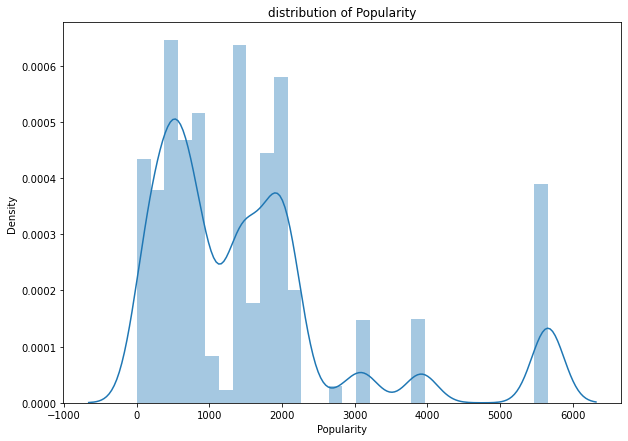

In [36]:
# looking distribution 
plt.figure(figsize=[10,7])
sns.distplot(car_df["Popularity"],bins=30)
plt.title("distribution of Popularity")
plt.show()

- most cars have popularity around 1000 with few having very high popularity

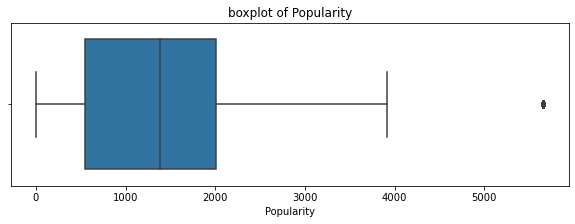

In [37]:
# looking boxplot
plt.figure(figsize=[10,3])
sns.boxplot(car_df["Popularity"])
plt.title("boxplot of Popularity")
plt.show()

- there are some outlier Popularity values preset beyond 4000 looking those outlier values

In [38]:
# outlier rows
outlier_p = car_df[car_df["Popularity"] > 4000]
outlier_p.sample(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4643,Ford,F-250,1999,regular unleaded,220.0,8.0,MANUAL,rear wheel drive,2.0,unknown,Large,Regular Cab Pickup,17,13,5657,2923
2096,Ford,C-Max Hybrid,2015,regular unleaded,188.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Compact,Wagon,37,42,5657,24170
4184,Ford,Escape Hybrid,2010,regular unleaded,177.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hybrid",Compact,4dr SUV,27,30,5657,34120
2916,Ford,Contour,1998,regular unleaded,125.0,4.0,MANUAL,front wheel drive,4.0,unknown,Midsize,Sedan,32,21,5657,2000
4357,Ford,Explorer Sport Trac,2009,regular unleaded,210.0,6.0,AUTOMATIC,rear wheel drive,4.0,Crossover,Compact,Crew Cab Pickup,20,14,5657,29835
4502,Ford,F-150,2015,flex-fuel (unleaded/E85),282.0,6.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,25,18,5657,30090
10650,Ford,Transit Connect,2015,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,unknown,Compact,Cargo Minivan,29,21,5657,22330
10298,Ford,Taurus,2017,premium unleaded (recommended),365.0,6.0,AUTOMATIC,all wheel drive,4.0,"Factory Tuner,High-Performance",Large,Sedan,24,16,5657,42520
8358,Ford,Ranger,2011,regular unleaded,207.0,6.0,MANUAL,rear wheel drive,4.0,unknown,Compact,Extended Cab Pickup,21,16,5657,23495
4359,Ford,Explorer Sport Trac,2009,regular unleaded,292.0,8.0,AUTOMATIC,four wheel drive,4.0,Crossover,Compact,Crew Cab Pickup,19,14,5657,33670


In [39]:
# looking numerical summary
outlier_p.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.0,868.000000
mean,2009.718894,243.097926,5.943548,3.374424,23.740783,17.634793,5657.0,27393.420507
std,8.063288,88.386855,1.425681,0.836944,5.927734,5.555760,0.0,16410.830904
min,1990.000000,63.000000,3.000000,2.000000,13.000000,11.000000,5657.0,2000.000000
25%,2003.750000,187.250000,4.000000,3.000000,19.000000,14.000000,5657.0,19832.500000
50%,2015.000000,220.000000,6.000000,4.000000,22.000000,16.000000,5657.0,28535.000000
75%,2016.000000,288.000000,6.000000,4.000000,27.000000,20.000000,5657.0,35876.250000
max,2017.000000,662.000000,8.000000,4.000000,42.000000,44.000000,5657.0,149995.000000


In [40]:
outlier_p.describe(include="object")

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,868,868,868,868,868,868,868,868
unique,1,51,4,3,4,21,3,15
top,Ford,F-150,regular unleaded,AUTOMATIC,rear wheel drive,unknown,Large,Sedan
freq,868,126,562,622,350,376,373,108


- these outlier Popularity values are **valid data** with just very popularity cars with **high value** which is manufactured by ford
- thus leaving as it is and moving to further analysis

# STANDARDISATION & FIXING INVALID VALUES

In [41]:
# looking categorical values
car_df.select_dtypes(include="object").head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible


### Make

In [42]:
# value counts
car_df3.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER'], dtype=object)

In [43]:
car_df3.Make.value_counts()

Chevrolet        1115
Ford              868
Volkswagen        805
Toyota            743
Dodge             626
Nissan            548
GMC               515
Honda             447
Mazda             403
Cadillac          397
Mercedes-Benz     352
Suzuki            348
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               226
Mitsubishi        210
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           156
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            67
Scion              60
FIAT               59
Maserati           58
Lamborghini        48
Rolls-Royce        31
Lotus              29
HUMMER             17
Maybach            13
Alfa Romeo          5
McLaren             5
Spyker              3
Genesis   

- all values seems ok, with **Chevrolet and ford** as top car makers

In [44]:
car_df3.select_dtypes(include=np.number).columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Model

In [46]:
# looking values
car_df3.Model.unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500', '500L', '500X', '550', '560-Class',
       '570S', '575M', '57', '599', '5', '6 Series Gran Coupe',
       '6 Series', '600-Class', '6000', '612 Scaglietti', '626', '62',
       '650S Coupe', '650S Spider', '6', '7 Series', '718 Cayman', '740',
       '760', '780', '8 Series', '80', '850', '86', '9-2X', '9-3 Griffin',
       '9-3', '9-4X', '9-5', '9-7X', '9000', '900', '90', '911', '928',
       '929', '940', '944', '960', '968', 'A3', 'A4 allroad', 'A4', 'A5',
       'A6', 'A7', 'A8', 'Acadia Limited', 'Acadia', 'Accent', 'Acclaim',
       'Accor

- all values seems ok, moving to further analysis

### Engine Fuel Type

In [47]:
# looking  values
car_df3["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'electric', 'natural gas',
       'flex-fuel (premium unleaded required/E85)'], dtype=object)

In [48]:
# looking values counts
car_df3["Engine Fuel Type"].value_counts()

regular unleaded                                7155
premium unleaded (required)                     1980
premium unleaded (recommended)                  1519
flex-fuel (unleaded/E85)                         899
diesel                                           153
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
electric                                          13
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

### Transmission Type

In [49]:
# looking values
car_df3["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN',
       'DIRECT_DRIVE'], dtype=object)

In [50]:
# looking value counts
car_df3["Transmission Type"].value_counts()

AUTOMATIC           8228
MANUAL              2922
AUTOMATED_MANUAL     617
UNKNOWN               19
DIRECT_DRIVE          15
Name: Transmission Type, dtype: int64

### Driven_Wheels

In [51]:
# looking values
car_df3["Driven_Wheels"].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [52]:
# looking value counts
car_df3["Driven_Wheels"].value_counts()

front wheel drive    4732
rear wheel drive     3337
all wheel drive      2329
four wheel drive     1403
Name: Driven_Wheels, dtype: int64

In [53]:
car_df3.select_dtypes(include=np.number).columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Market Category

In [54]:
# looking values
car_df3["Market Category"].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', 'unknown', 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance

In [55]:
# looking value counts
car_df3["Market Category"].value_counts()

unknown                                            3728
Crossover                                          1103
Flex Fuel                                           872
Luxury                                              851
Luxury,Performance                                  673
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Crossover,Exotic,Luxury,Performance                   1
Name: Market Category, Length: 71, dtype: int64

### Vehicle Size

In [56]:
# looking values
car_df3["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [57]:
# looking value counts
car_df3["Vehicle Size"].value_counts()

Compact    4703
Midsize    4353
Large      2745
Name: Vehicle Size, dtype: int64

- all seems ok, no need any cleaning

### Vehicle Style 

In [58]:
# looking values
car_df3["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [59]:
# looking value counts
car_df3["Vehicle Style"].value_counts()

Sedan                  3012
4dr SUV                2480
Coupe                  1185
Convertible             788
Crew Cab Pickup         681
4dr Hatchback           678
Extended Cab Pickup     623
Wagon                   587
2dr Hatchback           503
Passenger Minivan       412
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            70
Convertible SUV          29
Name: Vehicle Style, dtype: int64

- all seems ok, no need any cleaning

### duplicacy check

In [60]:
# checking duplicate values
car_df3.duplicated().sum()

715

In [61]:
car_df3[car_df3.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,unknown,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


- 715 duplicate rows are present dropping all

In [62]:
# dropping duplicated
car_df3 = car_df3.drop_duplicates()

In [63]:
car_df3.shape

(11086, 16)

- all data cleaning process has been done exporting the cleaned data to tableau for creating visualisations

In [64]:
# exporting
# car_df3.to_csv("car_features_df.csv", index=False)

# REGRESSION ANALYSIS

**Regression analysis to identify the variables that have the strongest
relationship with a car's price.**

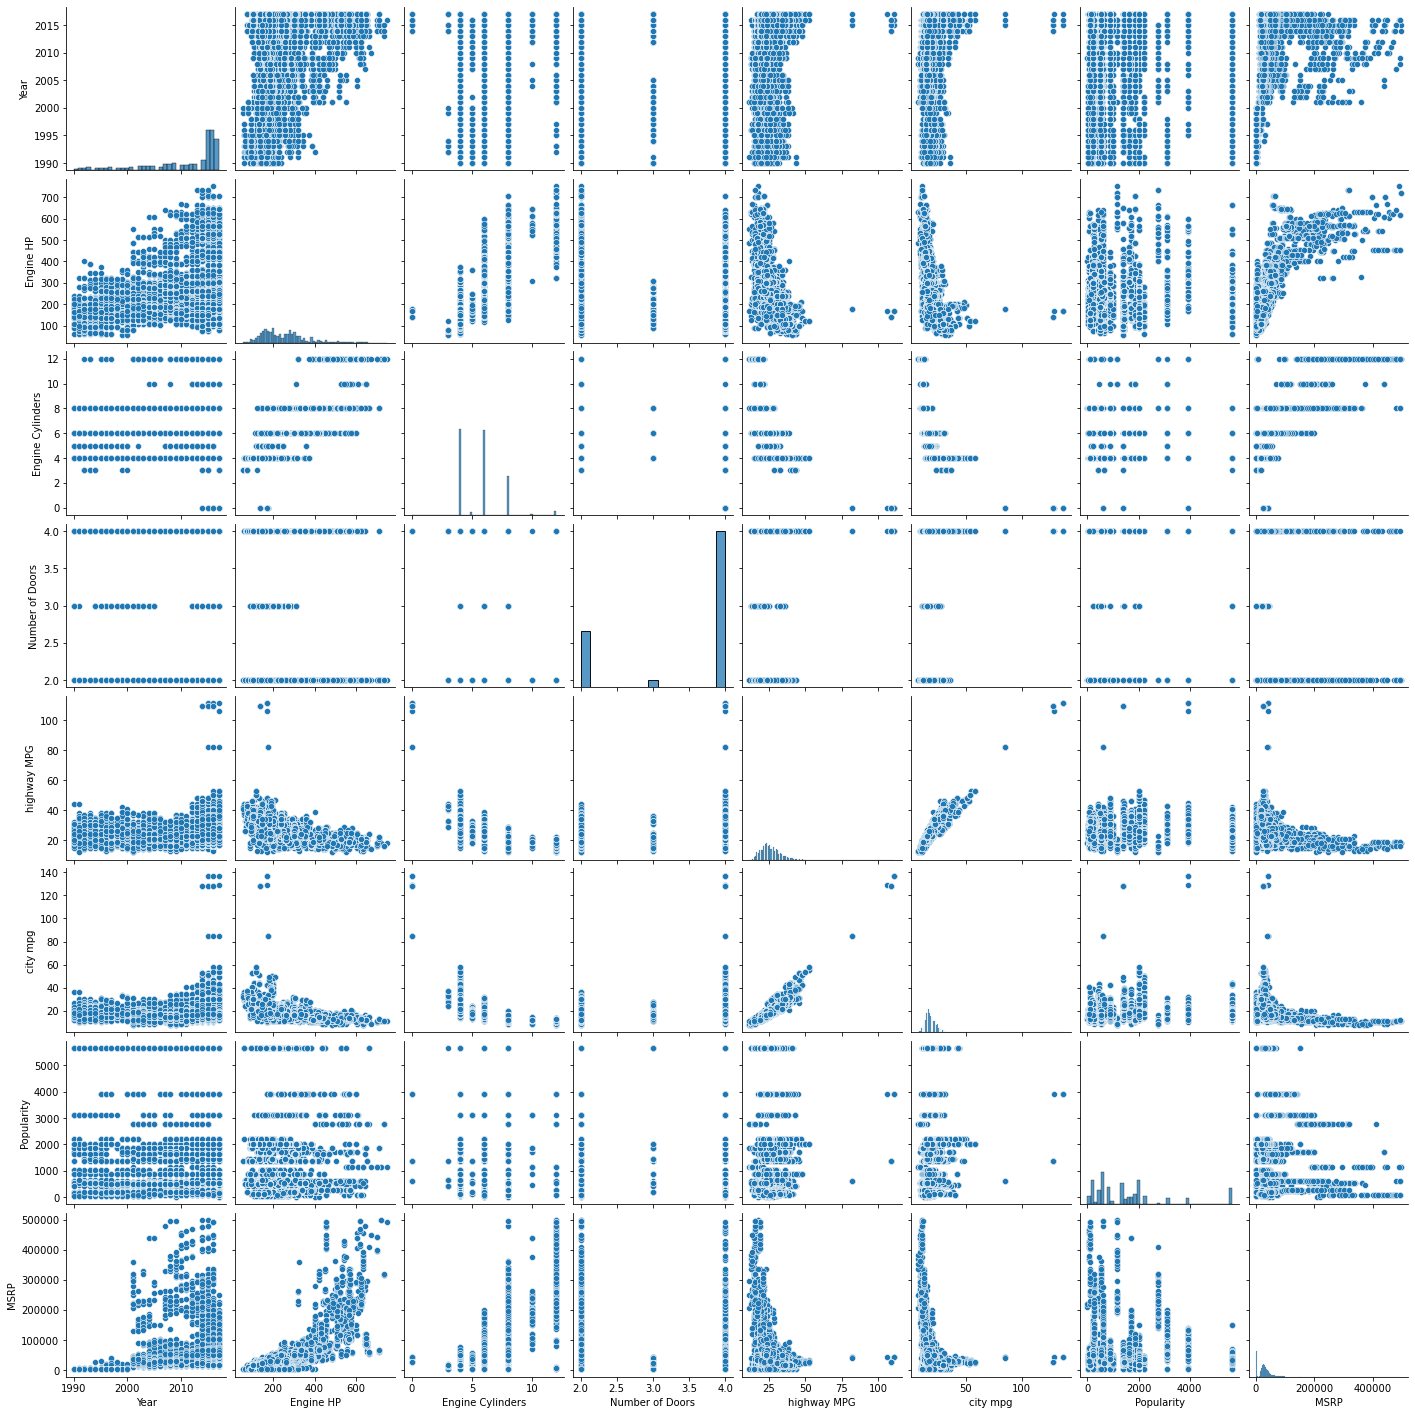

In [65]:
# looking relationship between dependent variables and the target variable
sns.pairplot(car_df3)
plt.show()

- engine hp and engine cylinders showing some positive linear relation with price

In [66]:
car_df3.select_dtypes(include="object").columns

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

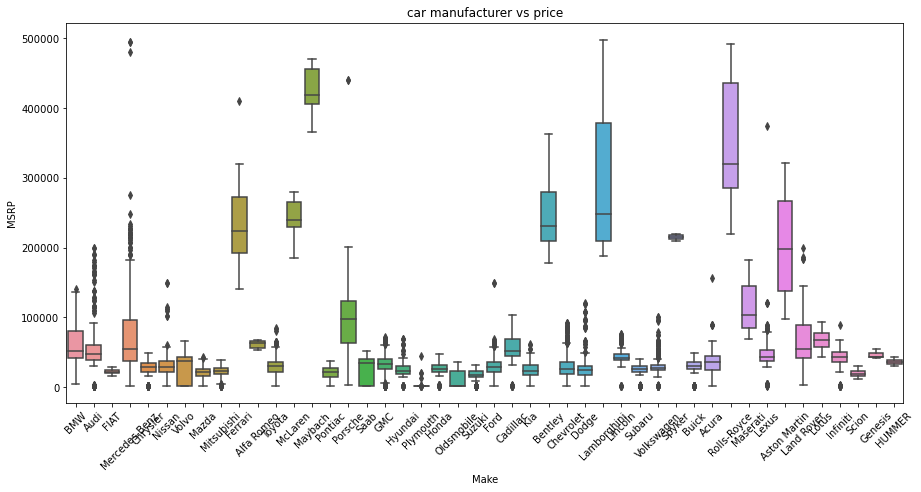

In [67]:
# visualising categroical variables vs price
plt.figure(figsize=[15,7])
sns.boxplot(car_df3["Make"],car_df3["MSRP"])
plt.title("car manufacturer vs price")
plt.xticks(rotation=45)
plt.show()

- there are some manufacturers with all there cars with high price and some with low price, this could be useful feature for determining  price.

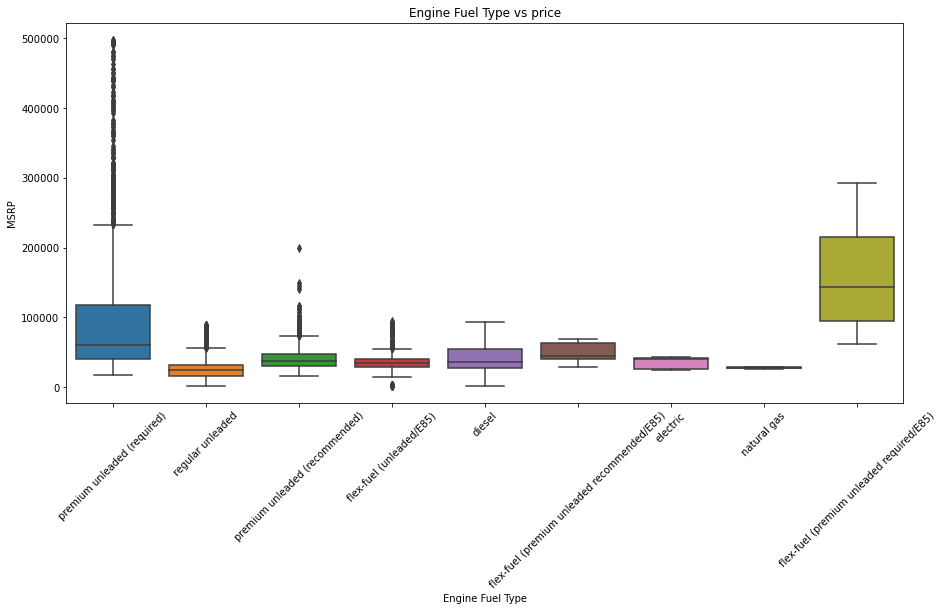

In [68]:
plt.figure(figsize=[15,7])
sns.boxplot(car_df3["Engine Fuel Type"],car_df3["MSRP"])
plt.title("Engine Fuel Type vs price")
plt.xticks(rotation=45)
plt.show()

- there is some relation of engine fuel  type with price.

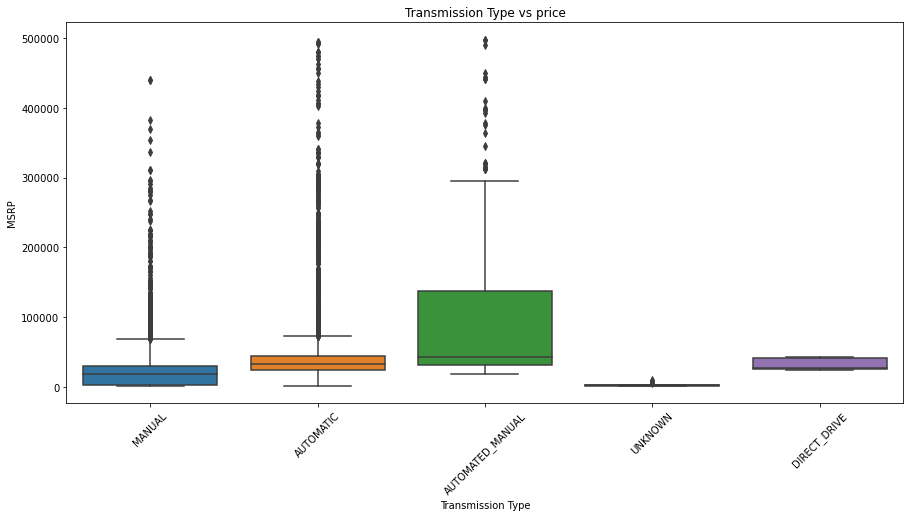

In [69]:
plt.figure(figsize=[15,7])
sns.boxplot(car_df3["Transmission Type"],car_df3["MSRP"])
plt.title("Transmission Type vs price")
plt.xticks(rotation=45)
plt.show()

- some relation with price

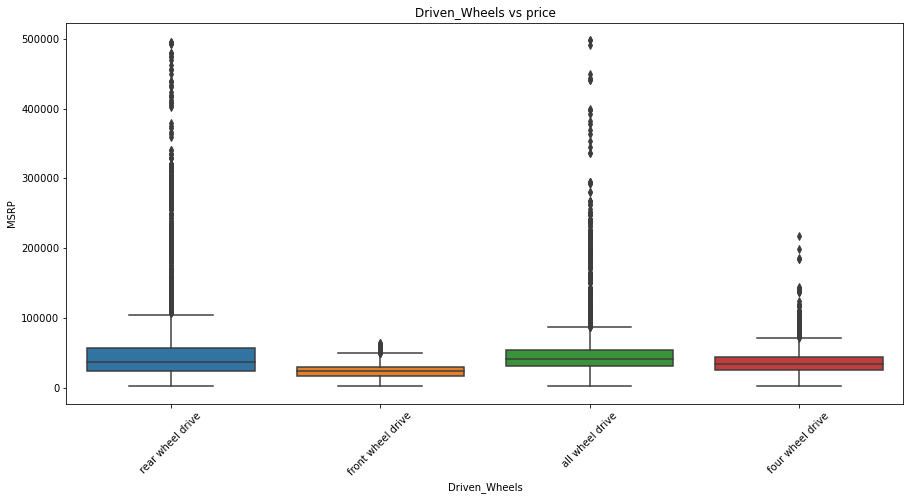

In [70]:
plt.figure(figsize=[15,7])
sns.boxplot(car_df3["Driven_Wheels"],car_df3["MSRP"])
plt.title("Driven_Wheels vs price")
plt.xticks(rotation=45)
plt.show()

- some relation with price

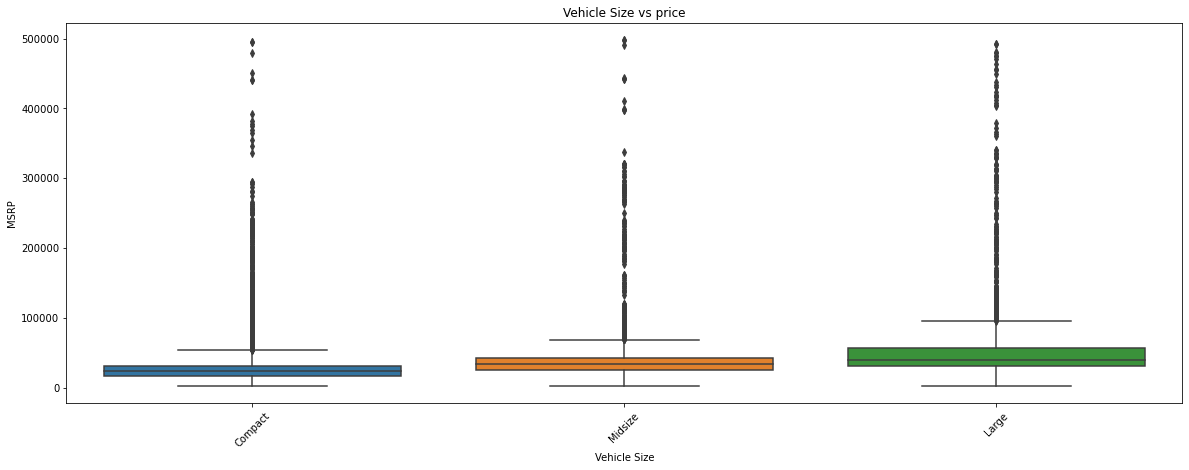

In [71]:
plt.figure(figsize=[20,7])
sns.boxplot(car_df3["Vehicle Size"],car_df3["MSRP"])
plt.title("Vehicle Size vs price")
plt.xticks(rotation=45)
plt.show()

- some relation with price

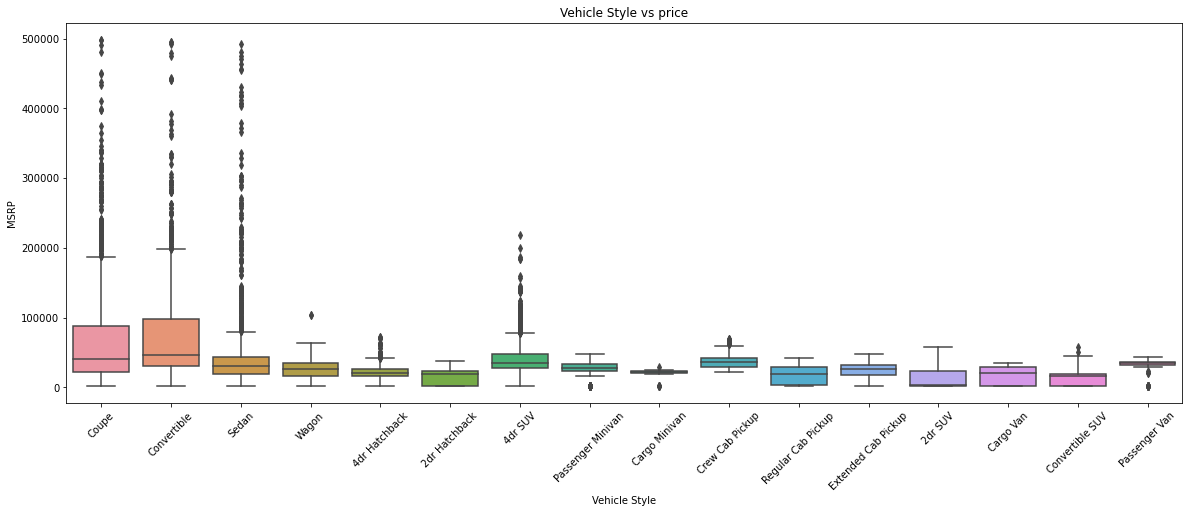

In [72]:
plt.figure(figsize=[20,7])
sns.boxplot(car_df3["Vehicle Style"],car_df3["MSRP"])
plt.title("Vehicle Style vs price")
plt.xticks(rotation=45)
plt.show()

- there is some relation of price with vehicle style

# PREPARING THE DATA FOR REGRESSION MODELLING
- **encoding**
  - converting the categorical data to dummies
- **scaling**

In [73]:
# categorical var
catg_list = car_df3.select_dtypes(include="object").columns
catg_list

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [74]:
# encoding categorical vars
dummy_df = pd.get_dummies(car_df3[["Engine Fuel Type","Transmission Type","Driven_Wheels",
                                   "Vehicle Size","Vehicle Style"]])
dummy_df.head()

,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
# concatinating dummy var to car_df
car_df4 = pd.concat([car_df3,dummy_df],axis=1)
car_df4.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,1,0,0,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,1,0,0,0,0,0,0,0,0,0


In [76]:
# dropping all categorical var
car_df4 = car_df4.drop(catg_list,axis=1)
car_df4.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


In [77]:
pd.set_option('display.max_columns', None)

In [78]:
# drop year as it will be redundant
car_df4 = car_df4.drop(["Year"],axis=1)
car_df4.head()

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_diesel,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,Engine Fuel Type_premium unleaded (recommended),Engine Fuel Type_premium unleaded (required),Engine Fuel Type_regular unleaded,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr Hatchback,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,335.0,6.0,2.0,26,19,3916,46135,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,300.0,6.0,2.0,28,19,3916,40650,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,300.0,6.0,2.0,28,20,3916,36350,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,230.0,6.0,2.0,28,18,3916,29450,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,230.0,6.0,2.0,28,18,3916,34500,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
car_df4.shape

(11086, 44)

### Scaling car_df

In [80]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [81]:
# scaling using min_max_scaling
scaler = MinMaxScaler()
car_df4[:] = scaler.fit_transform(car_df4)

In [82]:
# splitting into x data and y data
X = car_df4.drop(["MSRP"],axis=1)
Y = car_df4["MSRP"]

### Regression Model

In [83]:
# importing libraries
import statsmodels.api as sm

In [84]:
car_df3.select_dtypes(include=np.number).columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [85]:
col = ['Engine HP', 'city mpg', 'Engine Cylinders','Number of Doors', 'highway MPG','Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)', 'Vehicle Size_Large',
       'Vehicle Size_Midsize', 'Transmission Type_DIRECT_DRIVE']
X_lm = sm.add_constant(X[col])
lm = sm.OLS(Y,X_lm).fit()   # Running the linear model

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1659.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:55:28   Log-Likelihood:                 15078.
No. Observations:               11086   AIC:                        -3.013e+04
Df Residuals:                   11075   BIC:                        -3.005e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [87]:
coef_df = pd.DataFrame(lm.params.sort_values(ascending=False)[:-1])
coef_df = coef_df.reset_index()
coef_df.columns = ["car_features","Coefficients"]

In [88]:
coef_df

,car_features,Coefficients
0,Engine HP,0.413994
1,Engine Cylinders,0.215226
2,city mpg,0.206740
3,highway MPG,0.187763
4,Engine Fuel Type_flex-fuel (premium unleaded r...,0.056101
5,Number of Doors,-0.003663
6,Vehicle Size_Midsize,-0.025193
7,Transmission Type_DIRECT_DRIVE,-0.028642
8,Vehicle Size_Large,-0.046818
9,Engine Fuel Type_electric,-0.152231


In [89]:
# coef_df.to_csv("coef.csv",index=False)